<a href="https://colab.research.google.com/github/samarth70/Fine-tuning-of-Keras-models/blob/main/Fine_tuning_of_neural_net_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading Modules

In [ ]:
import tensorflow_datasets as tfds

In [1]:
from tensorflow.keras import *
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

# from  tensorflow.keras.preprocessing.image import  ImageDataGenerator

In [ ]:
(train_examples, validation_examples), info = tfds.load('cats_vs_dogs',with_info=True,as_supervised=True, 
    split=['train[:80%]', 'train[80%:]'],)

##Preprocessing images of PrefetchedDataset

In [ ]:
def format_image(image, label):
  image = tf.image.resize(image,(IMAGE_RES, IMAGE_RES))  #/255
  image=tf.keras.applications.vgg16.preprocess_input(image)    #vgg19.preprocess_input(image)    resnet50.preprocess_input(image)                   #nasnet.preprocess_input(image)    #mobilenet.preprocess_input(image)
  # image=image[None,...]
  return image,label

num_examples = info.splits['train'].num_examples

BATCH_SIZE = 152
IMAGE_RES = 224

train_batches = train_examples.cache().shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [ ]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

In [ ]:
keras_model=tf.keras.applications.vgg16.VGG16()  #resnet50.ResNet50()  #vgg19.VGG19()  #vgg19.VGG16()    nasnet.NASNetMobile() #vgg16.VGG16()  mobilenet.MobileNet() 


553467904/553467096 [==============================] - 3s 0us/step


In [ ]:
keras_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model=tf.keras.Sequential()
for layer in  keras_model.layers[:-1]:
  model.add(layer)



In [ ]:
for layer in model.layers:
  layer.trainable=False

In [ ]:
model.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
train=train_batches.as_numpy_iterator()
img,labels=next(iter(train_batches.take(1)))


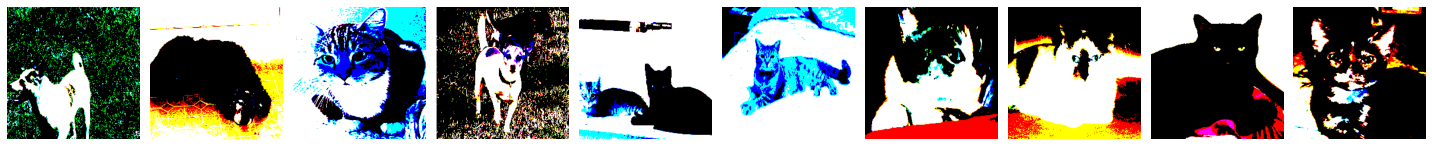

In [ ]:
def plot_image(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

plot_image(img)    

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches, validation_data=validation_batches,epochs=5)

Epoch 1/5
120/120 [==============================] - 121s 835ms/step - loss: 0.3587 - accuracy: 0.8376 - val_loss: 0.0728 - val_accuracy: 0.9733
Epoch 2/5
120/120 [==============================] - 93s 777ms/step - loss: 0.0674 - accuracy: 0.9739 - val_loss: 0.0570 - val_accuracy: 0.9783
Epoch 3/5
120/120 [==============================] - 92s 765ms/step - loss: 0.0510 - accuracy: 0.9801 - val_loss: 0.0512 - val_accuracy: 0.9813
Epoch 4/5
120/120 [==============================] - 92s 764ms/step - loss: 0.0449 - accuracy: 0.9824 - val_loss: 0.0478 - val_accuracy: 0.9819
Epoch 5/5
120/120 [==============================] - 92s 766ms/step - loss: 0.0396 - accuracy: 0.9856 - val_loss: 0.0463 - val_accuracy: 0.9839


##Saving Model

In [ ]:
t = time.time()

export_path_keras = "./model1.h5"
print(export_path_keras)

model.save(export_path_keras)

./model1.h5


In [ ]:
export_path_keras = "./model2.h5"
print(export_path_keras)

model.save(export_path_keras)

./model2.h5
